<a href="https://colab.research.google.com/github/toraaglobal/Case_Studies/blob/master/AdalineGradient_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python 3.5.4 |Continuum Analytics, Inc.|
# Jupyter Notebook 5.0.0

# SAMPLE CODE FROM RASCHKA (2015)
# ADAPTIVE LINEAR NEURON CLASSIFICATION FOR IRIS DATA

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

In [0]:
# CREATE ADALINE CLASSIFIER
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [0]:
# FUNCTION FOR PLOTTING CLASSIFICATION REGIONS

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [0]:
# OBTAIN
# USING FAMOUS IRIS DATA SET FROM FISHER

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

In [0]:
# SCRUB

# ONLY USE SETOSA & VERSICOLOR
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# ONLY USE SEPAL & PETAL LENGTH
X = df.iloc[0:100, [0, 2]].values

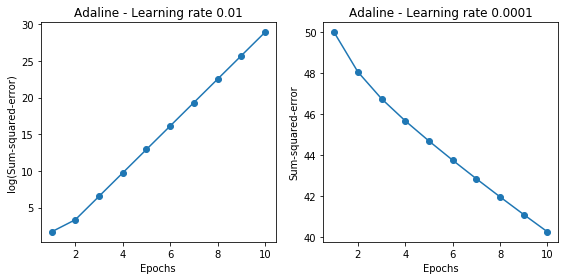

In [6]:
# SOME QUICK THEORY
# SAMPLE FIGURES FOR DISPLAYING IMPACT OF LEARNING RATE
# LEARNING RATE TOO HIGH - INCREASE IN ERROR 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# LEARNING RATE TOO SMALL - INCREASE IN NUMBER OF EPOCHS

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

In [0]:
# SCRUB
# STANDARDIZATION - SUBTRACTING MEAN / DIVIDING BY STD DEV
# IF FEATURES HAVE A LARGE RANGE, THESE FEATURES MIGHT DOMINATE IMPACT ON CLASSIFIER
# GRADIENT DESCENT CONVERGES FASTER WITH FEATURE SCALING

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


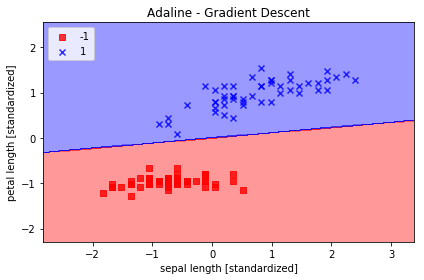

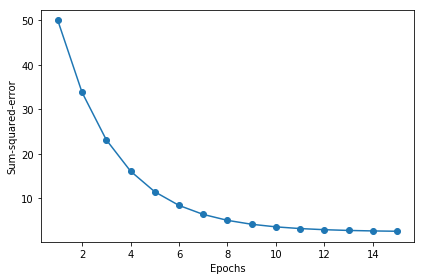

In [8]:
# FIRST PASS ON USING Adaline Gradient Descent
# SET ITERATIONS AT 15 & LEARNING RATE AT 0.01

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_goodeta.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


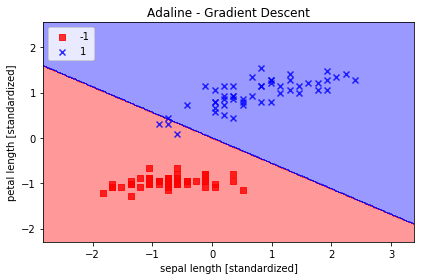

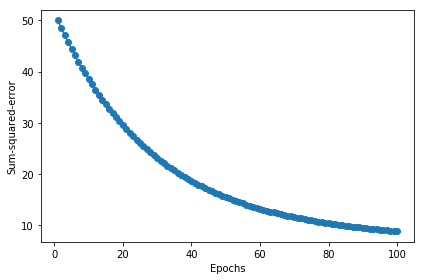

In [9]:
# SECOND PASS ON USING Adaline Gradient Descent
# SET ITERATIONS AT 100 & LEARNING RATE AT 0.0001

ada = AdalineGD(n_iter=100, eta=0.0001)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_smalleta.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


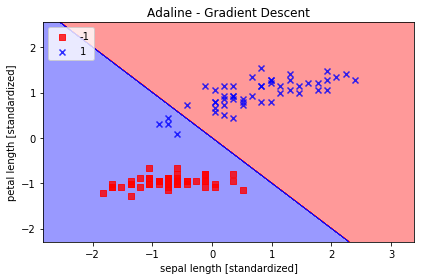

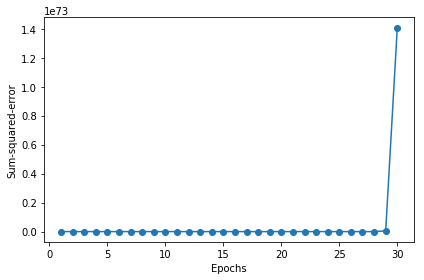

In [10]:
# THIRD PASS ON USING Adaline Gradient Descent
# SET ITERATIONS AT 30 & LEARNING RATE AT 0.1

ada = AdalineGD(n_iter=30, eta=0.1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_badeta.png', dpi=300)
plt.show()

In [11]:
# System Information
import platform

print('Python is ' + platform.python_version())

pd.show_versions(as_json=False)

Python is 3.6.7

INSTALLED VERSIONS
------------------
commit: None
python: 3.6.7.final.0
python-bits: 64
OS: Linux
OS-release: 4.14.79+
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.24.2
pytest: 3.6.4
pip: 19.1.1
setuptools: 41.0.1
Cython: 0.29.7
numpy: 1.16.3
scipy: 1.3.0
pyarrow: 0.13.0
xarray: 0.11.3
IPython: 5.5.0
sphinx: 1.8.5
patsy: 0.5.1
dateutil: 2.5.3
pytz: 2018.9
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.9
feather: 0.4.0
matplotlib: 3.0.3
openpyxl: 2.5.9
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: None
lxml.etree: 4.2.6
bs4: 4.6.3
html5lib: 1.0.1
sqlalchemy: 1.3.3
pymysql: None
psycopg2: 2.7.6.1 (dt dec pq3 ext lo64)
jinja2: 2.10.1
s3fs: 0.2.1
fastparquet: None
pandas_gbq: 0.4.1
pandas_datareader: 0.7.0
gcsfs: None


/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
